## ***STOCK PREDICTIONS (Global Beverages Limited)***

**IMPORTATION OF NECCESSARY LIBRARIES AND MOUNTING OF** **DRIVE**

In [1]:
# Installation of required packages
!pip install tensorflow scikeras scikit-learn
!pip install keras-tuner

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Machine learning libraries
import sklearn as sk
from sklearn import metrics
from sklearn.model_selection import (KFold, GridSearchCV, train_test_split, cross_val_score, StratifiedKFold)
from sklearn.impute import SimpleImputer
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, accuracy_score, make_scorer)
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier)
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from xgboost import XGBRegressor
scaler=MinMaxScaler(feature_range=(0,1))

# Keras
import keras
import keras_tuner
from kerastuner import Objective
from kerastuner.tuners import RandomSearch
from keras.models import Model, Sequential
from scikeras.wrappers import KerasClassifier
from keras.layers import Input, Dense, Dropout, LSTM
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
import seaborn as sns


# Additional Libraries
from google.colab import drive

<ipython-input-1-184ed2c1b356>:23: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import Objective


In [2]:
# Mounts the Google Drive to the specified directory '/content/drive'
# This allows access to files and data stored in your Google Drive within the Colab environment
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***DATA COLLECTION & PRE-PROCESSING***


In [3]:
# Reasa CSV file into a Pandas DataFrame
# This file is located in the specified Google Drive directory and is loaded into the variabe 'first_dataset (2022 to 2023)' for further data analysis
dataset = pd.read_csv('/content/drive/MyDrive/stock_data.csv')

In [4]:
dataset.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL
...,...,...,...,...,...,...,...,...
19581,2017-11-06,178.56000,180.45000,178.31000,180.17000,13275578,0,FB
19582,2017-11-07,180.50000,180.74800,179.40300,180.25000,12903836,0,FB
19583,2017-11-08,179.79000,180.35000,179.11000,179.56000,10467606,0,FB
19584,2017-11-09,178.31000,179.40000,177.09000,179.30000,12602188,0,FB


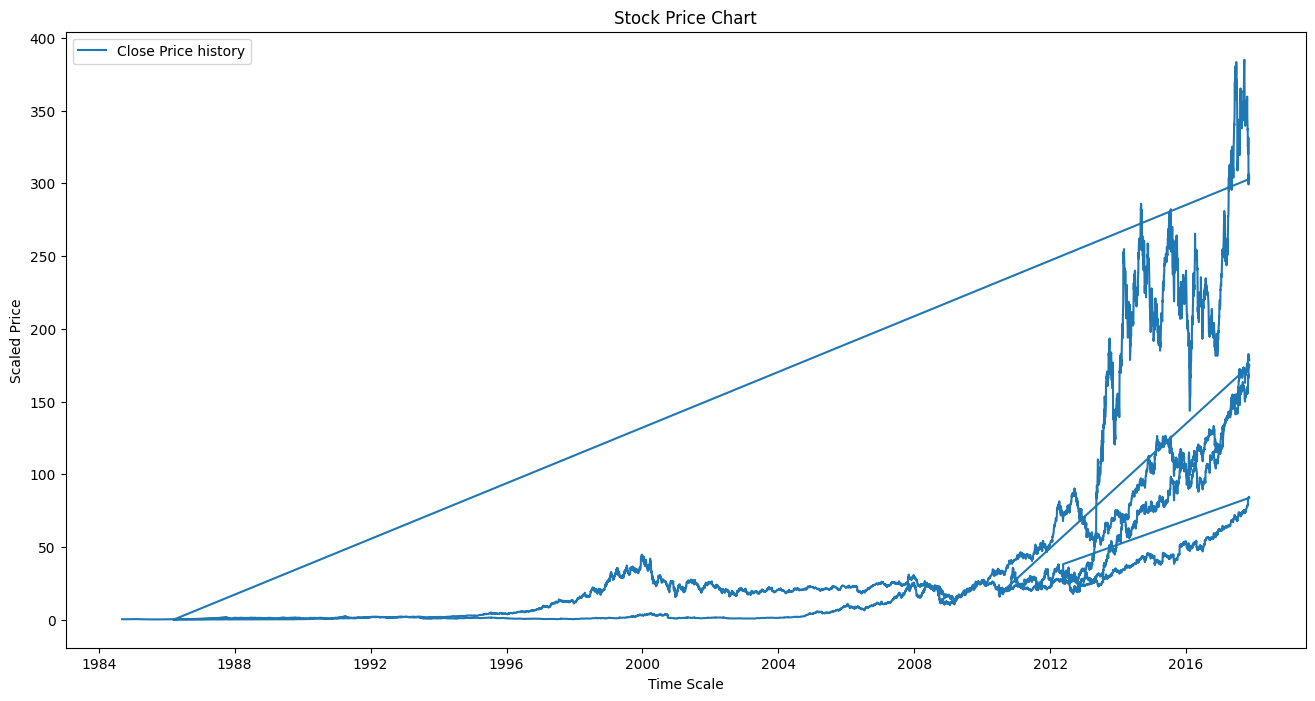

In [7]:
# Analyze the closing prices from dataframe
dataset["Date"]=pd.to_datetime(dataset.Date,format="%Y-%m-%d")
dataset.index = dataset['Date']

plt.figure(figsize=(16,8))
plt.plot(dataset["Close"],label='Close Price history')

# Customize labels and title
plt.xlabel('Time Scale')
plt.ylabel('Scaled Price')
plt.title('Stock Price Chart')
plt.legend()

# Show the plot
plt.show()

In [8]:
# Sort the dataset on date time and filter “Date” and “Close” columns
data = dataset.sort_index(ascending=True,axis=0)
new_dataset = pd.DataFrame(index=range(0,len(dataset)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i] = data['Date'][i]
    new_dataset["Close"][i] = data["Close"][i]

In [9]:
# Select columns with numeric data typesin the Pandas Dataframe
# This filters and returns ONLY the columns that contain numerical data
dataset.select_dtypes(include='number')

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0
...,...,...,...,...,...,...
2017-11-06,178.56000,180.45000,178.31000,180.17000,13275578,0
2017-11-07,180.50000,180.74800,179.40300,180.25000,12903836,0
2017-11-08,179.79000,180.35000,179.11000,179.56000,10467606,0


In [10]:
# The 'verbose = True' option provides detailed information, including the datatypes,non-null counts, and memory usage
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19586 entries, 1984-09-07 to 2017-11-10
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     19586 non-null  datetime64[ns]
 1   Open     19586 non-null  float64       
 2   High     19586 non-null  float64       
 3   Low      19586 non-null  float64       
 4   Close    19586 non-null  float64       
 5   Volume   19586 non-null  int64         
 6   OpenInt  19586 non-null  int64         
 7   Stock    19586 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.3+ MB


In [11]:
# This provides a previewof the top 20 rows of the DataFrame for us to examine
dataset.head(20)

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
Date,,,,,,,,
1984-09-07,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1984-09-10,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
1984-09-11,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
1984-09-12,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
1984-09-13,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL
1984-09-14,1984-09-14,0.44052,0.45589,0.44052,0.44566,68847968,0,AAPL
1984-09-17,1984-09-17,0.45718,0.46357,0.45718,0.45718,53755262,0,AAPL
1984-09-18,1984-09-18,0.45718,0.46103,0.44052,0.44052,27136886,0,AAPL
1984-09-19,1984-09-19,0.44052,0.44566,0.43157,0.43157,29641922,0,AAPL


Removing columns with **30%** or more null values*

In [12]:
# Defines a threshold for missing data
threshold = 0.3

# Calculates the proportion of missing data for each column
nullpercent = dataset.isnull().mean()

# Filter the DataFame to retain columns wit missing data proportions less than the specified threshold
dataset = dataset.loc[:,nullpercent<threshold]

In [13]:
# Analyzing the new DataFrame
dataset.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19586 entries, 1984-09-07 to 2017-11-10
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     19586 non-null  datetime64[ns]
 1   Open     19586 non-null  float64       
 2   High     19586 non-null  float64       
 3   Low      19586 non-null  float64       
 4   Close    19586 non-null  float64       
 5   Volume   19586 non-null  int64         
 6   OpenInt  19586 non-null  int64         
 7   Stock    19586 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.3+ MB


In [14]:
# This filters and returns ONLY the columns that DO NOT contain numeric data, excluding integers, floats, etc.
dataset.select_dtypes(exclude=['number'])

,Date,Stock
Date,,
1984-09-07,1984-09-07,AAPL
1984-09-10,1984-09-10,AAPL
1984-09-11,1984-09-11,AAPL
1984-09-12,1984-09-12,AAPL
1984-09-13,1984-09-13,AAPL
...,...,...
2017-11-06,2017-11-06,FB
2017-11-07,2017-11-07,FB
2017-11-08,2017-11-08,FB


In [15]:
# Numeric Splitting (Imputing for Numerical Values)
num1 = dataset.select_dtypes(include=['number'])

# Non-numeric Splitting (Imputing for Categorical Values)
obj1 = dataset.select_dtypes(exclude=['number'])

In [16]:
# This includes statistics like count, mean, standard deviation, minimum, and quartiles for each numeric columns
num1.describe()

,Open,High,Low,Close,Volume,OpenInt
count,19586.000000,19586.000000,19586.000000,19586.000000,1.958600e+04,19586.0
mean,37.408582,37.881571,36.906405,37.406667,8.100395e+07,0.0
std,59.492049,60.287797,58.622548,59.480058,7.982366e+07,0.0
min,0.067200,0.067200,0.067200,0.067200,0.000000e+00,0.0
25%,1.412300,1.440600,1.384100,1.412300,3.385552e+07,0.0
50%,19.649500,19.933000,19.363000,19.640000,6.294731e+07,0.0
75%,38.605000,39.075750,38.229250,38.655500,1.010604e+08,0.0
max,386.690000,389.610000,379.345000,385.000000,2.069770e+09,0.0


In [17]:
# Import the SimpleImputer classfrom scikit-learn to handle missing values
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with the strategyof imputing missing values using the mean
imp=SimpleImputer(strategy="mean")

# Calculate the mean values of the numeric columns in the DataFrame and store them as an array
num1.mean().values

# Fit imputer to the data in 'num1' to replace missing valued with the calculated means
imp.fit(num1)

SimpleImputer()

In [18]:
# Use the imputer to fill missing values in the DataFrame 'num1' and store the result in 'X'
X=imp.transform(num1)

# Create a new DataFrame'num1_imputed' with values, preserving column names
num1_imputed=pd.DataFrame(X,columns=num1.columns)

In [19]:
num1 = num1_imputed

In [20]:
num1.isnull().any()

Open       False
High       False
Low        False
Close      False
Volume     False
OpenInt    False
dtype: bool

In [21]:
# Count the number of null values
num1.isnull().sum()

Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [22]:
# Forward-fill (ffill) propagates the last observed non-null value forward in each column
new_obj1= obj1.ffill()

In [23]:
new_obj1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19586 entries, 1984-09-07 to 2017-11-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    19586 non-null  datetime64[ns]
 1   Stock   19586 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 459.0+ KB


In [24]:
new_obj1.isnull().sum()

Date     0
Stock    0
dtype: int64

In [25]:
obj1 = new_obj1

In [26]:
obj1.isnull().any()

Date     False
Stock    False
dtype: bool

In [27]:
print(obj1.columns)

Index(['Date', 'Stock'], dtype='object')


In [28]:
# List of column names to be encoded
columns = ['Date', 'Stock']

# Create a dictionary to store LabelEncoder instances for each column
dict_obj = {}

# Iterate through the list of columns and apply LabelEncoder to each
for col in columns:
  obj=LabelEncoder()
  obj1[col]=obj.fit_transform(obj1[col])
dict_obj[col]=obj

In [29]:
obj1

,Date,Stock
Date,,
1984-09-07,0,0
1984-09-10,1,0
1984-09-11,2,0
1984-09-12,3,0
1984-09-13,4,0
...,...,...
2017-11-06,8361,1
2017-11-07,8362,1
2017-11-08,8363,1


In [30]:
# Reset the index of both DataFrames to ensure unique index values
obj1.reset_index(drop=True, inplace=True)
num1.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames along axis 1
cleaned_dataset = pd.concat([obj1, num1], axis=1)

In [31]:
cleaned_dataset.isnull().sum().sum()

0

In [32]:
print(cleaned_dataset.columns)

Index(['Date', 'Stock', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


***FEATURE ENGINEERING AND IMPORTANCE***

Data Scaling

In [33]:
# Normalize the new filtered dataset
scaler = MinMaxScaler(feature_range=(0,1))
final_dataset = cleaned_dataset.values

train_data = final_dataset[0:987,:]
valid_data = final_dataset[987:,:]

cleaned_dataset.index = cleaned_dataset.Date
cleaned_dataset.drop("Date",axis=1,inplace=True)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [34]:
# Calculate the correlation matrix for the Dataframe
correlation_matrix = cleaned_dataset.corr()

# Extract the 'Closing Price' column as the target variable
target = cleaned_dataset['Close']

# Sort and store the features by their correlation with the 'Closing Price' tagreget variable in descending order
top_features = correlation_matrix['Close'].sort_values(ascending = False)

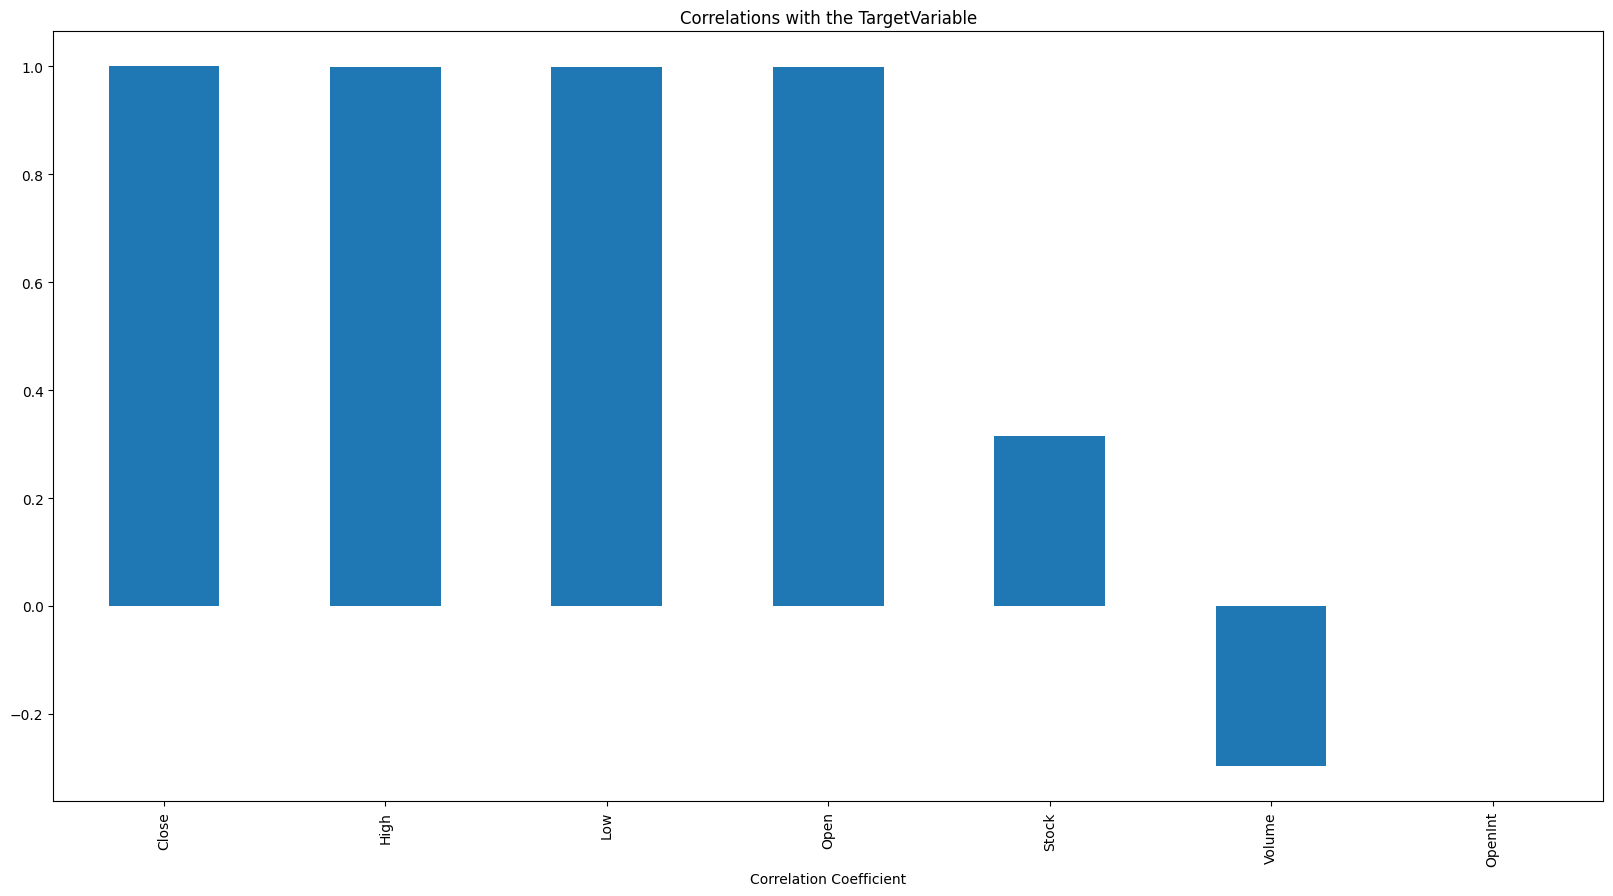

In [35]:
# Create a bar plot to visualize the correlation of the featues with the target variable
top_features.plot(kind='bar')

# Set the title for the plot
plt.title("Correlations with the TargetVariable")

# Label the x-axis with "Correlation Coefficient"
plt.xlabel("Correlation Coefficient")

# Display the plot
plt.show()

In [36]:
# Set a correlation threshold limit of 0.55
limits = 0.55

# Extract the column names with the correlation greater than 0.55 with the 'overall' target variable
corrs = correlation_matrix[correlation_matrix['Close']>limits].index

# Create a newDataFrame containing the columns that meet the correlation threshold
chosen_correlations = data[corrs]

#Get the column names
chosen_correlations.columns

# Assigns
cleaned_dataset = chosen_correlations

In [37]:
cleaned_dataset.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

***BUILDING AND TRAINING MODELS***

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Remove the 'Closing Price' column from the DataFrame 'features'to create the feature matrix 'X'
X = cleaned_dataset.drop("Close", axis=1)

# Extract the 'Closing Price' column as the target variable 'y'
y = cleaned_dataset["Close"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Convert X_train to a NumPy array and reshape
x_train_reshaped = x_train.values.reshape((x_train.shape[0], 1, x_train.shape[1]))

# Convert y_train to a NumPy array
y_train_array = y_train.values

# Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the entire dataset
model.fit(x_train_reshaped, y_train_array, epochs=1, batch_size=1, verbose=2)

# Assuming X_test and y_test are your test data
# Convert X_test to a NumPy array and reshape
X_test_reshaped = x_test.values.reshape((x_test.shape[0], 1, x_test.shape[1]))

# Convert y_test to a NumPy array
y_test_array = y_test.values

# Evaluate the model on the test data
results = model.evaluate(X_test_reshaped, y_test_array, verbose=0)
print(f"Fold Loss: {results}")


15668/15668 - 62s - loss: 1563.5571 - 62s/epoch - 4ms/step
Fold Loss: 927.6784057617188


In [64]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming 'Date' is the index column in your DataFrame
X_test_reshaped = []

for i in range(60, cleaned_dataset.shape[0]):
    X_test_reshaped.append(cleaned_dataset.loc[cleaned_dataset.index[i - 60:i], 'Close'].values)

# Pad sequences to ensure uniform length
X_test_reshaped = pad_sequences(X_test_reshaped, dtype='float32', padding='post', truncating='post')

# Assuming 'Close' is the name of the column you want to predict
X_test_reshaped = np.reshape(X_test_reshaped, (X_test_reshaped.shape[0], X_test_reshaped.shape[1]))

# Assuming 'Close' is the name of the column you want to predict
X_test_reshaped = np.reshape(X_test_reshaped, (X_test_reshaped.shape[0], 1, X_test_reshaped.shape[1]))

predicted_closing_price = model.predict(X_test_reshaped)
# predicted_closing_price = scaler.inverse_transform(predicted_closing_price)



InvalidArgumentError: ignored

In [63]:
# Visualize the predicted stock costs with actual stock costs
train_data = cleaned_dataset[:987]
valid_data = cleaned_dataset[987:]
valid_data['Predictions'] = predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

ValueError: ignored

In [65]:
# Save the LSTM model
model.save("saved_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
